# 2.1.3 电场

如果我们有若干个点电荷 $q_1, q_2, q_3, \cdots$, 它们距检验电荷 $Q$ 的距离分别为 $\mathfrak r_1, \mathfrak r_2, \mathfrak r_3,\cdots$ 则 $Q$ 受到的力显然为
$$
  \boldsymbol F = \boldsymbol F_1 + \boldsymbol F_2 + \boldsymbol F_3 + \cdots
$$
或者
$$
  \boldsymbol F = Q \boldsymbol E
  \tag{2.3}
$$
式中，
$$
  \boldsymbol E(\boldsymbol r) = \frac{1}{4\pi\varepsilon_0} \sum_{i = 1}^{n} \frac{q_i}{\mathfrak r_i^2} \hat{\mathfrak r_i}
  \tag{2.4}
$$
称为源电荷的电场。

## 习题2.2

(a)
两个都带电为 $q$ 的电荷，相距 $d$ 放置，求距它们中点为 $z$ 处(图2.4)电场的大小和方向。
用 $z>>d$ 时所期望的结果验证你的结果。

这时在 $x$ 方向没有分量，因此考虑 $y$ 方向：
$$
\begin{split}
  E = E_y
  = & 2 \cdot \frac{1}{4\pi\varepsilon_0} \frac{q}{\frac{d^2}{4} + z^2} \cdot \frac{z}{\sqrt{\frac{d^2}{4} + z^2}}
\end{split}
$$


当 $z>>d$ 时，可以将两个电荷视为一个电荷，期望的结果是一个带电量为 $2q$ 的电荷产生的场：
$$
  E = \frac{1}{4\pi\varepsilon_0} \frac{2q}{z^2}
$$

只要注意到
$$
  E = \frac{1}{4\pi\varepsilon_0} \frac{2q}{z^2} \frac{1}{\frac{d^2}{4z^2} + 1} \frac{1}{\sqrt{d^2}{4z^2} + 1} \approx \frac{1}{4\pi\varepsilon_0} \frac{2q}{z^2}
$$

(b)

把右边的电荷 $q$ 换为 $-q$，重新计算电场。

这时在 $y$ 方向没有分量，因此考虑 $x$ 方向：
$$
\begin{split}
  E = E_x
  = & 2 \cdot \frac{1}{4\pi\varepsilon_0} \frac{q}{\frac{d^2}{4} + z^2} \frac{\frac{d}{2}}{\sqrt{\frac{d^2}{4} + z^2}}\\
\end{split}
$$

矢量场：


((8991804694.45736*N.x - 4495902347.22868)/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2) + (8991804694.45736*N.x + 4495902347.22868)/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2))*N.i + (8991804694.45736*N.y/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2) + 8991804694.45736*N.y/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2))*N.j + (8991804694.45736*N.z/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2) + 8991804694.45736*N.z/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2))*N.k

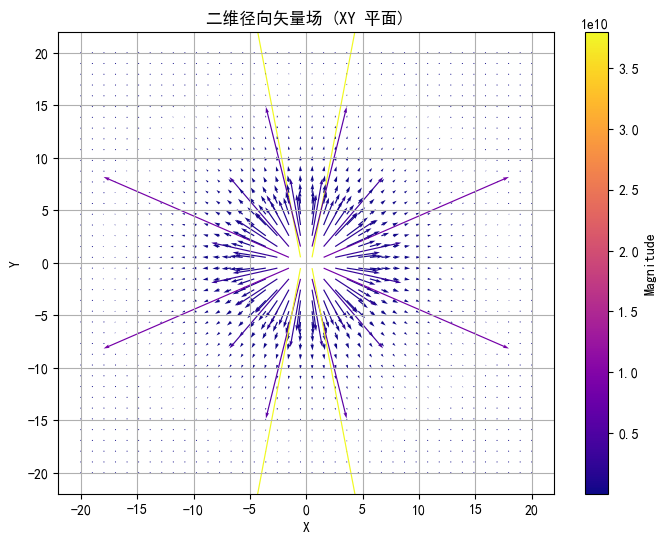

In [4]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    varepsilon_0 = 8.85e-12 # 真空中的介电常数
    q = 1 # 电荷量
    # 电荷分布：对称于 y 轴的两点电荷
    d = 1 # 电荷间距
    A_left = 1/(4*np.pi*varepsilon_0) * q * ((N.x + d/2) * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt((N.x + d/2)**2 + N.y**2 + N.z**2)) ** 3)
    A_right = 1/(4*np.pi*varepsilon_0) * q * ((N.x - d/2) * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt((N.x - d/2)**2 + N.y**2 + N.z**2)) ** 3)
    A = A_left + A_right
    print('矢量场：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-20, 20, 40)
y = np.linspace(-20, 20, 40)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

#### 异号电荷(电偶极子)

矢量场：


((4495902347.22868 - 8991804694.45736*N.x)/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2) + (8991804694.45736*N.x + 4495902347.22868)/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2))*N.i + (8991804694.45736*N.y/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2) - 8991804694.45736*N.y/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2))*N.j + (8991804694.45736*N.z/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2) - 8991804694.45736*N.z/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2))*N.k

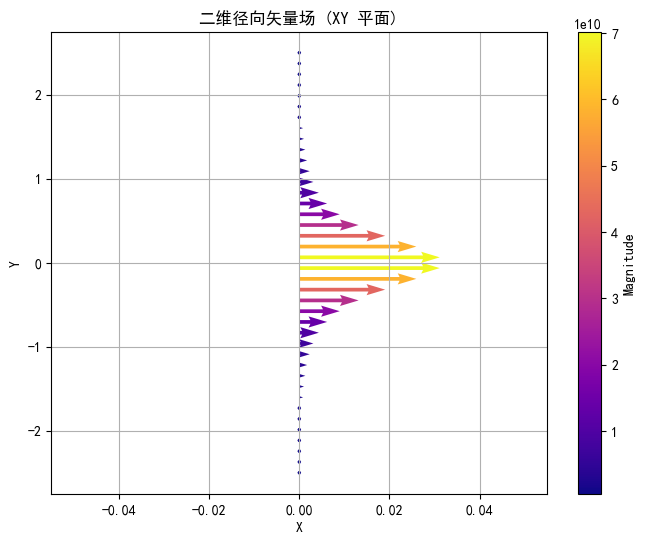

In [5]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    varepsilon_0 = 8.85e-12 # 真空中的介电常数
    q = 1 # 电荷量
    # 电荷分布：对称于 y 轴的两点电荷
    d = 1 # 电荷间距
    A_left = 1/(4*np.pi*varepsilon_0) * q * ((N.x + d/2) * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt((N.x + d/2)**2 + N.y**2 + N.z**2)) ** 3)
    A_right = -1/(4*np.pi*varepsilon_0) * q * ((N.x - d/2) * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt((N.x - d/2)**2 + N.y**2 + N.z**2)) ** 3)
    A = A_left + A_right
    print('矢量场：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(0, 0, 1)
y = np.linspace(-2.5, 2.5, 40)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

矢量场：


((4495902347.22868 - 8991804694.45736*N.x)/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2) + (8991804694.45736*N.x + 4495902347.22868)/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2))*N.i + (8991804694.45736*N.y/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2) - 8991804694.45736*N.y/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2))*N.j + (8991804694.45736*N.z/(N.y**2 + N.z**2 + (N.x + 0.5)**2)**(3/2) - 8991804694.45736*N.z/(N.y**2 + N.z**2 + (N.x - 0.5)**2)**(3/2))*N.k

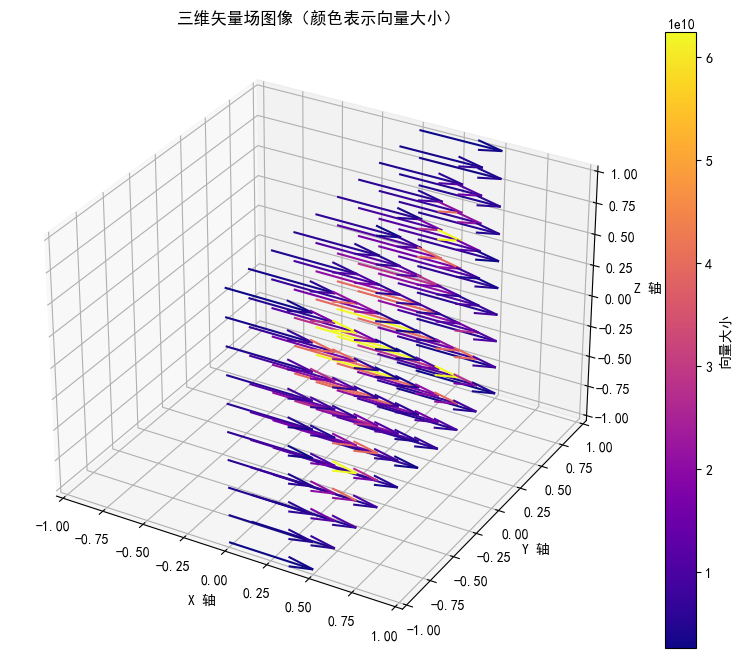

In [15]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):

    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    varepsilon_0 = 8.85e-12 # 真空中的介电常数
    q = 1 # 电荷量
    # 电荷分布：对称于 y 轴的两点电荷
    d = 1 # 电荷间距
    A_left = 1/(4*np.pi*varepsilon_0) * q * ((N.x + d/2) * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt((N.x + d/2)**2 + N.y**2 + N.z**2)) ** 3)
    A_right = -1/(4*np.pi*varepsilon_0) * q * ((N.x - d/2) * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt((N.x - d/2)**2 + N.y**2 + N.z**2)) ** 3)
    A = A_left + A_right
    print('矢量场：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(0, 0, 1)
y = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()